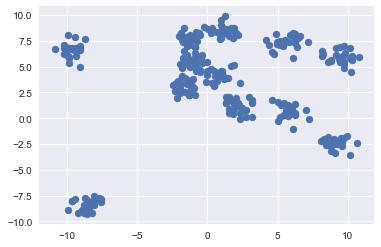

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=12,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

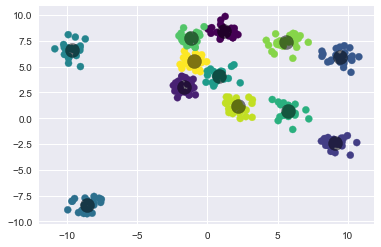

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

ValueError: Colormap c:ootball_edge_list.txt is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

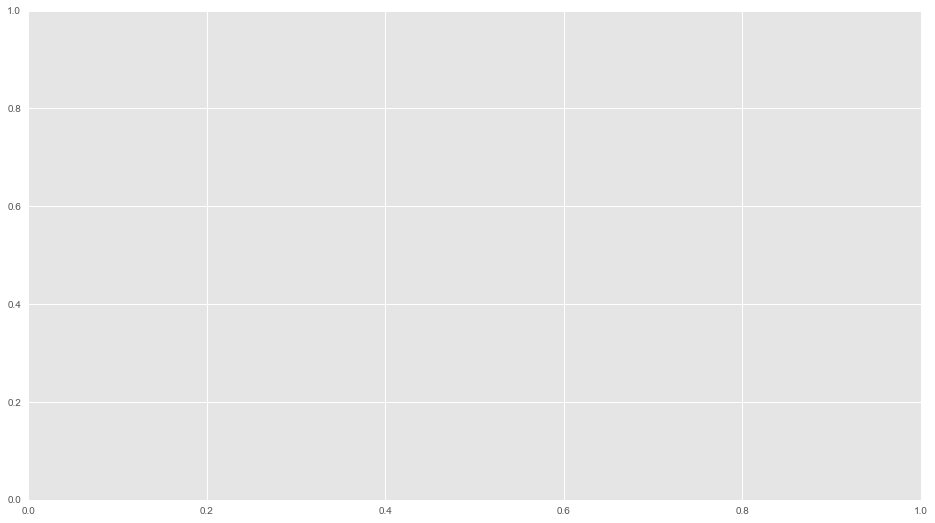

In [35]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='c:\football_edge_list.txt');


Label Propagation digits: Demonstrating performance

This example demonstrates the power of semisupervised learning by
training a Label Spreading model to classify handwritten digits
with sets of very few labels.

The handwritten digit dataset has 1797 total points. The model will
be trained using all points, but only 30 will be labeled. Results
in the form of a confusion matrix and a series of metrics over each
class will be very good.

At the end, the top 10 most uncertain predictions will be shown.



C:\Users\Gilma\Anaconda3\lib\site-packages\sklearn\semi_supervised\label_propagation.py:288: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning
C:\Users\Gilma\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Label Spreading model: 30 labeled & 583 unlabeled points (613 total)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        48
          1       0.69      0.47      0.56        62
          2       1.00      0.98      0.99        60
          3       0.00      0.00      0.00        56
          4       0.94      0.94      0.94        51
          5       0.90      0.95      0.93        65
          6       0.81      0.97      0.88        63
          7       0.98      1.00      0.99        56
          8       0.59      0.86      0.70        63
          9       0.54      0.83      0.65        59

avg / total       0.74      0.80      0.76       583

Confusion matrix
[[48  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  2 14  0 17  0]
 [ 0  0 59  0  0  0  1  0  0]
 [ 0  3  0 48  0  0  0  0  0]
 [ 0  0  0  0 62  0  0  0  3]
 [ 0  1  0  0  1 61  0  0  0]
 [ 0  0  0  0  0  0 56  0  0]
 [ 0  9  0  0  0  0  0 54  0]
 [ 0  0  0  3  4  0  0  3 49]]


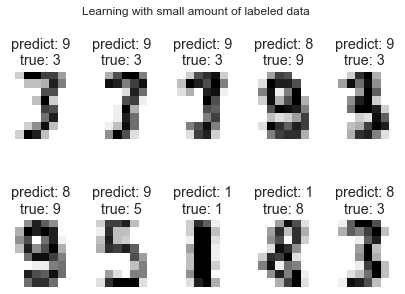

In [24]:
"""
===================================================
Label Propagation digits: Demonstrating performance
===================================================

This example demonstrates the power of semisupervised learning by
training a Label Spreading model to classify handwritten digits
with sets of very few labels.

The handwritten digit dataset has 1797 total points. The model will
be trained using all points, but only 30 will be labeled. Results
in the form of a confusion matrix and a series of metrics over each
class will be very good.

At the end, the top 10 most uncertain predictions will be shown.
"""
print(__doc__)

# Authors: Clay Woolam <clay@woolam.org>
# License: BSD

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets
from sklearn.semi_supervised import label_propagation
from sklearn.metrics import confusion_matrix, classification_report

digits = datasets.load_digits()
rng = np.random.RandomState(0)
indices = np.arange(len(digits.data))
rng.shuffle(indices)

X = digits.data[indices[:613]]
y = digits.target[indices[:613]]
images = digits.images[indices[:613]]

n_total_samples = len(y)
n_labeled_points = 30

indices = np.arange(n_total_samples)

unlabeled_set = indices[n_labeled_points:]

# #############################################################################
# Shuffle everything around
y_train = np.copy(y)
y_train[unlabeled_set] = -1

# #############################################################################
# Learn with LabelSpreading
lp_model = label_propagation.LabelSpreading(gamma=0.25, max_iter=5)
lp_model.fit(X, y_train)
predicted_labels = lp_model.transduction_[unlabeled_set]
true_labels = y[unlabeled_set]

cm = confusion_matrix(true_labels, predicted_labels, labels=lp_model.classes_)

print("Label Spreading model: %d labeled & %d unlabeled points (%d total)" %
      (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples))

print(classification_report(true_labels, predicted_labels))

print("Confusion matrix")
print(cm)

# #############################################################################
# Calculate uncertainty values for each transduced distribution
pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)

# #############################################################################
# Pick the top 10 most uncertain labels
uncertainty_index = np.argsort(pred_entropies)[-10:]

# #############################################################################
# Plot
f = plt.figure(figsize=(7, 5))
for index, image_index in enumerate(uncertainty_index):
    image = images[image_index]

    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    sub.set_title('predict: %i\ntrue: %i' % (
        lp_model.transduction_[image_index], y[image_index]))

f.suptitle('Learning with small amount of labeled data')
plt.show()


In [3]:
#coding=utf8



import sys

import random

import networkx as nx

import matplotlib.pyplot as plt



def read_graph_from_file(path):

    # read edge-list from file

    graph = nx.read_edgelist(path, data = (('weight', float), ))



    # initial graph node's attribute 'label' with its id

    for node, data in graph.nodes_iter(True):

        data['label'] = node



    return graph



def read_game_info_from_file(path):

    game = {}



    with file(path, 'r') as f:

        for line in f:

            line = line.strip()

            data = line.split('\t')

            game[data[0]] = data[1]



    return game



# label-propagation algorithm

# use asynchronous updating for better results

def lpa(graph):

    def estimate_stop_cond():

        for node in graph.nodes_iter():

            count = {}



            for neighbor in graph.neighbors_iter(node):

                neighbor_label = graph.node[neighbor]['label']

                neighbor_weight = graph.edge[node][neighbor]['weight']

                count[neighbor_label] = count.setdefault(neighbor_label, 0.0) + neighbor_weight



            # find out labels with maximum count
            count_items = count.items()

            count_items.sort(key = lambda x: x[1], reverse = True)
            

            # if there is not only one label with maximum count then choose one randomly
            labels = [k for k,v in count_items if v == count_items[0][1]]


            if graph.node[node]['label'] not in labels:

                return False

        return True

    loop_count = 0

    while True:

        loop_count += 1

        print ('loop', loop_count)
        for node in graph.nodes_iter():

            count = {}

            for neighbor in graph.neighbors_iter(node):
                neighbor_label = graph.node[neighbor]['label']
                neighbor_weight = graph.edge[node][neighbor]['weight']           

                count[neighbor_label] = count.setdefault(neighbor_label, 0.0) + neighbor_weight
                
            # find out labels with maximum count
            count_items = count.items()
            count_items.sort(key = lambda x: x[1], reverse = True)


            # if there is not only one label with maximum count then choose one randomly
            labels = [(k, v) for k, v in count_items if v == count_items[0][1]]

            label = random.sample(labels, 1)[0][0]

            graph.node[node]['label'] = label

        if estimate_stop_cond() is True or loop_count >= 10:
            print ('complete')
            return


def print_graph_info(graph):

    game_info = read_game_info_from_file('sample/id_name.info')
    info = {}

    for node, data in graph.nodes_iter(True):
        info.setdefault(graph.node[node]['label'], []).append(game_info.get(node, node))

    print ('node num:', len(graph.nodes()))
    print ('class num:', len(info.keys()))
    print ('class:', info.keys())
    print ('info:')

    for clazz in info:
        print ('\t%s(%d):' % (clazz, len(info[clazz])),)

        for label in info[clazz]:
            print ('\'%s\'' % label,)
            
        print ('\n',)

if __name__ == '__main__':

    g = read_graph_from_file('sample/d.data')
    lpa(g)
    print_graph_info(g)

    node_color = [float(g.node[v]['label']) for v in g]
    labels = dict([(node, node) for node, data in g.nodes_iter(True)])
    nx.draw_networkx(g, node_color = node_color)

    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'sample/d.data'

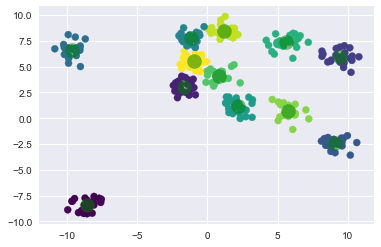

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200, alpha=0.5);

In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import unicodecsv
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Importing the dataset
data = pd.read_list('football_edge_list.txt') 
print("Input Data and Shape")
print(data.shape)
data.head()

# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C)

# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')



'''
==========================================================
scikit-learn
==========================================================
'''

from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values")
print("Scratch")
print(C) # From Scratch
print("sklearn")
print(centroids) # From sci-kit learn

AttributeError: module 'pandas' has no attribute 'read_list'

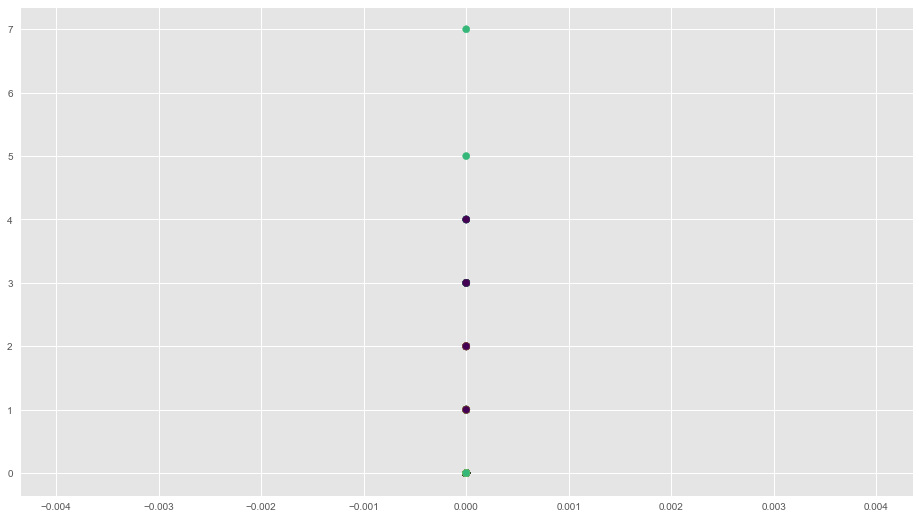

In [25]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');


Label Propagation digits: Demonstrating performance

This example demonstrates the power of semisupervised learning by
training a Label Spreading model to classify handwritten digits
with sets of very few labels.

The handwritten digit dataset has 1797 total points. The model will
be trained using all points, but only 30 will be labeled. Results
in the form of a confusion matrix and a series of metrics over each
class will be very good.

At the end, the top 10 most uncertain predictions will be shown.



C:\Users\Gilma\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


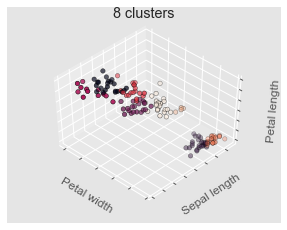

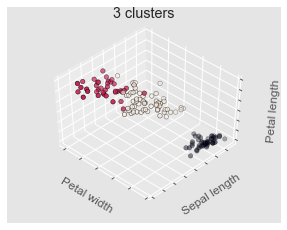

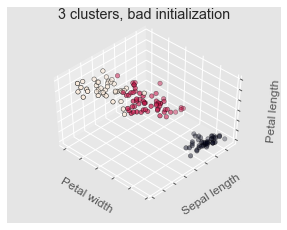

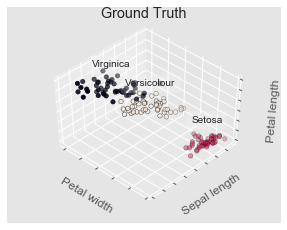

In [27]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()


Label Propagation digits: Demonstrating performance

This example demonstrates the power of semisupervised learning by
training a Label Spreading model to classify handwritten digits
with sets of very few labels.

The handwritten digit dataset has 1797 total points. The model will
be trained using all points, but only 30 will be labeled. Results
in the form of a confusion matrix and a series of metrics over each
class will be very good.

At the end, the top 10 most uncertain predictions will be shown.



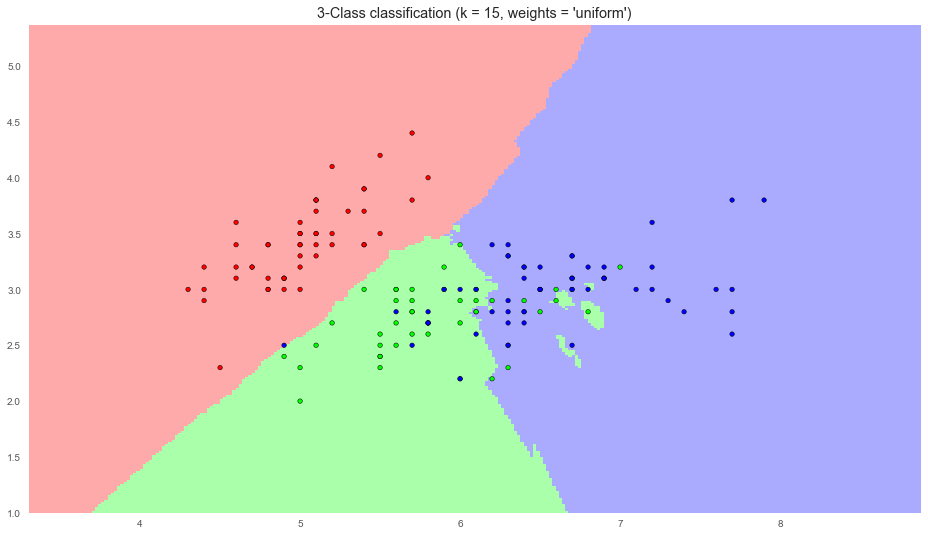

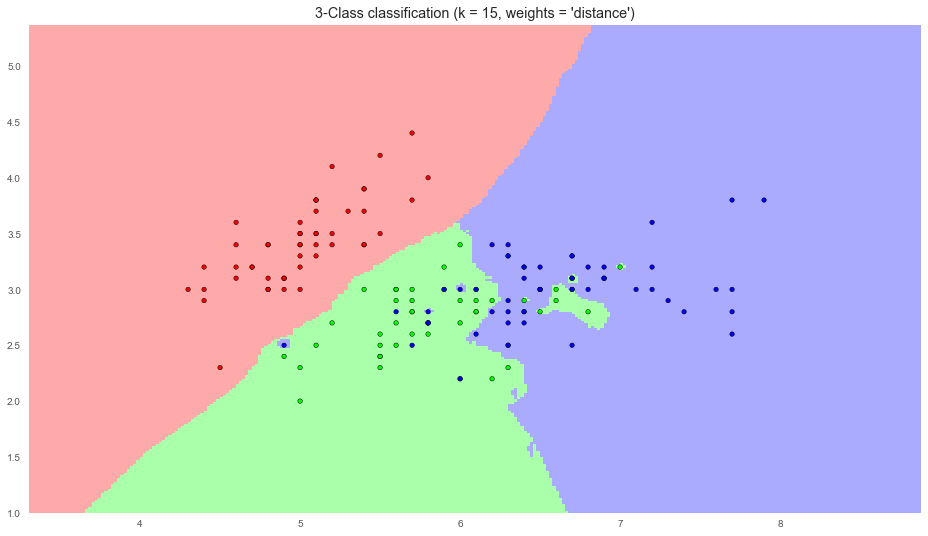

In [28]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()


Label Propagation digits: Demonstrating performance

This example demonstrates the power of semisupervised learning by
training a Label Spreading model to classify handwritten digits
with sets of very few labels.

The handwritten digit dataset has 1797 total points. The model will
be trained using all points, but only 30 will be labeled. Results
in the form of a confusion matrix and a series of metrics over each
class will be very good.

At the end, the top 10 most uncertain predictions will be shown.

Estimated number of clusters: 245
Homogeneity: 0.952
Completeness: 0.229
V-measure: 0.369
Adjusted Rand Index: 0.110
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.130


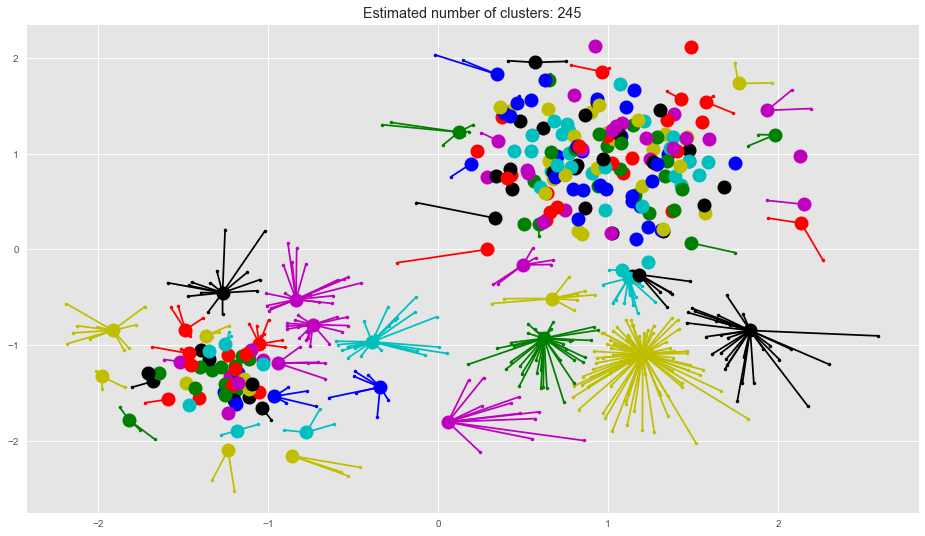

In [32]:
print(__doc__)

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=610, centers=centers, cluster_std=0.5,
                            random_state=0)

# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [37]:
# -*- coding: utf-8 -*-
import networkx as nx
import numpy as np
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics.SISModel as sis
import random
import sys

#importar o grafo
grafo = nx.read_adjlist(sys.argv[1], nodetype= int)

print (grafo.number_of_nodes())
#2- criar modelo
model = sis.SISModel(grafo)

#3- criar a configuração 
cfg = mc.Configuration()
#configurando 
cfg.add_model_parameter("beta", 0.2857)
cfg.add_model_parameter("lambda", 0.142)

cfg.add_model_parameter("percentage_infected", 0.05)

#4- adicionar a configuração ao modelo estabelecido
model.set_initial_status(cfg)

#5- executar
#iteração de inicialização/padrão
#model.iteration()
model.iteration()
iteration = model.iteration()
#iteration = model.iteration()

print (iteration["status_delta"][0])


FileNotFoundError: [Errno 2] No such file or directory: '-f'

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [40]:
boston_dataset = datasets.load_boston()
X_full = boston_dataset.data
Y = boston_dataset.target
print (X_full.shape)
print (Y.shape)


(506, 13)
(506,)


C:\Users\Gilma\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  del sys.path[0]


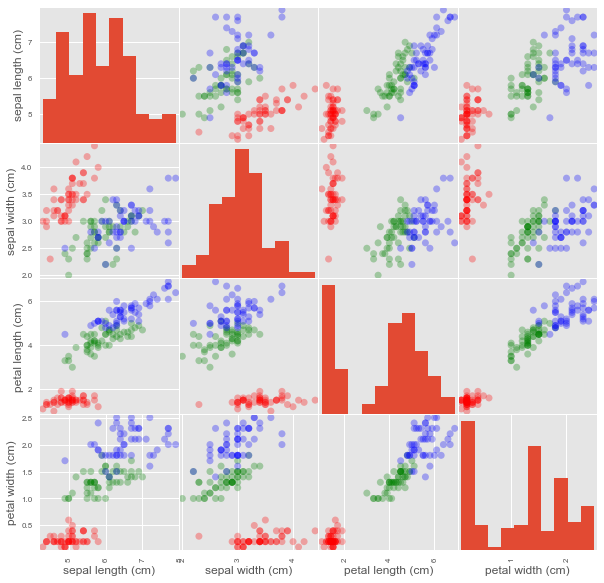

In [42]:
import pandas as pd
import numpy as np
colors = list()
palette = {0: "red", 1: "green", 2: "blue"}

for c in np.nditer(iris.target): colors.append(palette[int(c)])
# using the palette dictionary, we convert
# each numeric class into a color string
dataframe = pd.DataFrame(iris.data,
columns=iris.feature_names)
scatterplot = pd.scatter_matrix(dataframe, alpha=0.3,
figsize=(10, 10), diagonal='hist', color=colors, marker='o',
grid=True)

In [2]:
import urllib
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a1a'
a2a = urllib.urlopen(target_page)
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file(a2a)
print (X_train.shape, y_train.shape)

AttributeError: module 'urllib' has no attribute 'urlopen'